<a href="https://colab.research.google.com/github/es-smaha/Python_part/blob/main/Python_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [210]:
df = pd.read_csv('dataset_bi_engineer.csv' , sep =",")
df



,Unnamed: 0,IdUser,LabelPublication,Device,Category,Date,SessionDuration
0,0,0,Octane,tablet,Auto & Moto,2018-11-02 0:00:00,3751
1,1,0,Octane,tablet,Auto & Moto,2018-11-02 0:00:00,3751
2,2,0,Cuisine a & d Hors Série,tablet,Cuisine,2018-11-02 0:00:00,3751
3,3,0,Octane,tablet,Auto & Moto,2018-11-02 0:00:00,3751
4,4,0,Octane,tablet,Auto & Moto,2018-11-02 0:00:00,3751
...,...,...,...,...,...,...,...
93192,93192,2646,Elle Décoration,tablet,Déco & Design,2018-11-22 0:00:00,2418
93193,93193,2646,Le Revenu,tablet,Presse spécialisée,2018-11-24 0:00:00,999
93194,93194,2646,L'Univers de la Maison,tablet,Déco & Design,2018-11-25 0:00:00,2866
93195,93195,2646,L'Univers de la Maison,tablet,Déco & Design,2018-11-25 0:00:00,2866


In [211]:
#lets check how much our dataset contains 
df.shape

(93197, 7)

In [212]:
#displayig data types 
df["IdUser"] = df["IdUser"].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93197 entries, 0 to 93196
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        93197 non-null  int64 
 1   IdUser            93197 non-null  object
 2   LabelPublication  93197 non-null  object
 3   Device            93197 non-null  object
 4   Category          93084 non-null  object
 5   Date              93197 non-null  object
 6   SessionDuration   93197 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.0+ MB


In [213]:
df.describe()  # for describing numerical info

,Unnamed: 0,SessionDuration
count,93197.000000,93197.000000
mean,46598.000000,2450.140037
std,26903.800856,2639.717619
min,0.000000,0.000000
25%,23299.000000,556.000000
50%,46598.000000,1684.000000
75%,69897.000000,3436.000000
max,93196.000000,25239.000000


In [214]:
df.describe(include=object) #for displaying object info 

# '''here we can see that we have 93197 Pulications in total but 93084 in category which means that there is some null values 
# in category columns '''


,IdUser,LabelPublication,Device,Category,Date
count,93197,93197,93197,93084,93197
unique,2647,1470,2,21,30
top,2606,Paris Match,tablet,People & TV,2018-11-25 0:00:00
freq,638,2644,72173,12071,4138


In [215]:
df['Category'].isna().sum() 

113

In [216]:
null_cat  = df[df.isna().any(axis=1)]
pulication_with_no_cat = set(null_cat['LabelPublication'].tolist()) # here we will display those publications
print(" the pulications that belongs to no  category , in total there is " + str(len(pulication_with_no_cat))  )
print(pulication_with_no_cat )


 the pulications that belongs to no  category , in total there is 37
{'Midi Libre Nîmes', "Ça M''Intéresse Hors-Série", 'Harvard Business Review', "Chasseur d'Images", 'Geo Histoire', 'Enduro by Moto Verte', "Ça M'Intéresse Questions / Réponses", 'Nord Littoral', 'Management Hors Série', "Ça M'Intéresse", 'Vogue Collections', 'Tout Comprendre Max', 'National Geographic Traveler Hors Série', 'Geo Aventure', 'Prima', 'Capital Hors-Série', 'National Geographic Hors-Série Sciences', 'La République du Centre Orléans', 'Midi Libre Sète', 'GQ UK', 'National Geographic Traveler', 'National Geographic Hors-Série', 'La Montagne Clermont-Métropole', "Ça M'Intéresse Histoire", 'Télé 2 Semaines', 'Maison & Jardin actuels', "Ça M'Intéresse Hors-Série Le Guide", 'Cuisine Actuelle Best Of', 'Geo Collection', 'Maison Décoration', 'The Economist', 'Sciences et Avenir Hors-Série', 'La Cucina Italiana Gli Speciali', 'Cuisine Actuelle Manger Mieux', 'Jeux Video News', 'Marie Claire Fashion Shows', 'AD Coll

# 1- **how many unique users are there in this dataset ** **texte en gras**

In [217]:
# there is 2647 users 
print("there is " + str(len(df['IdUser'].unique())) + " unique values for users ")

there is 2647 unique values for users 


In [218]:
# users that appeared only once in the dataset  , there are 154 

Unique_User ={}
for user, value in df['IdUser'].value_counts().to_dict().items():
    if(value == 1):
        Unique_User[user] = value
         
print(" Number of unique users :" , len(Unique_User))


 Number of unique users : 154


# **The top 5 most read publications on Tablet and smartphone ?**

method 1 : using group by and sort

In [219]:
''' using group by we can show in the same dataframe 5 top pubs ( from 0-4) for tablet '''
''' and 5 top pubs ( from 5 to 9 for mobile) '''
most_pub = df['LabelPublication'].groupby(df['Device']).value_counts().groupby(level=0).head(5).sort_values(ascending=False).to_frame('counts').reset_index()
most_pub

,Device,LabelPublication,counts
0,tablet,Paris Match,2129
1,tablet,Le Point,1868
2,tablet,Closer,1684
3,tablet,Public,1566
4,tablet,Le Parisien,1484
5,mobile,Le Parisien,995
6,mobile,Public,650
7,mobile,Paris Turf,591
8,mobile,Closer,535
9,mobile,Paris Match,515


methode 2 : value_counts() and dislaying piecharts 

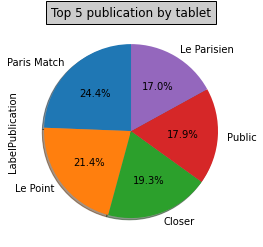

In [220]:
data_tablet = df[df['Device'] == 'tablet']
data_tablet['LabelPublication'].value_counts()[:5].plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Top 5 publication by tablet", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

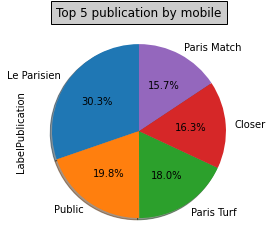

In [221]:
data_Phone = df[df['Device'] == 'mobile']
data_Phone['LabelPublication'].value_counts()[:5].plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Top 5 publication by mobile", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# **The 3 categories with the most readers after November 15, 2018 ?**

In [222]:
# first we convert date to datetime 
df["Date_time"] = df['Date'].apply(lambda x:pd.to_datetime(x))

In [223]:
data_afterDate = df[df['Date_time'] > pd.to_datetime('2018-11-15')]
data_afterDate['Category'].value_counts()[:3]
#top categories here are people & tv , Quotidiens , Actualites 

People & TV    6264
Quotidiens     5813
Actualités     5810
Name: Category, dtype: int64

Text(0.5, 1.0, 'top 3 categories with most readers after November 15, 2018')

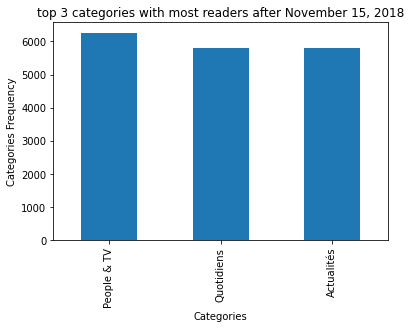

In [224]:
data_afterDate['Category'].value_counts()[:3].plot.bar()
plt.xlabel("Categories")
plt.ylabel("Categories Frequency")
plt.title("top 3 categories with most readers after November 15, 2018")

# **A reader of the magazine "Elle" reads on average how many times this same magazine on this dataset** 

In [225]:
# from what i understood from the question that one reader read ELLE many times , so we have to calculate the average 
# for each reader for same magazine 

Elle_Pub = df[df['LabelPublication'] =='Elle']
elle =Elle_Pub['IdUser'].value_counts() / len(df['LabelPublication'].unique())
elle

618     0.026531
941     0.019728
2274    0.018367
1324    0.017687
395     0.016327
          ...   
1395    0.000680
1430    0.000680
1440    0.000680
1492    0.000680
1333    0.000680
Name: IdUser, Length: 383, dtype: float64

In [226]:
#how many time elle readings in the dataset 
avr_elle = df[df['LabelPublication'] =='Elle']
avr_elle = len(avr_elle)/len(df)
avr_elle*100 #ELLE represent 2.06 % for the intire dataset

2.065517130379733

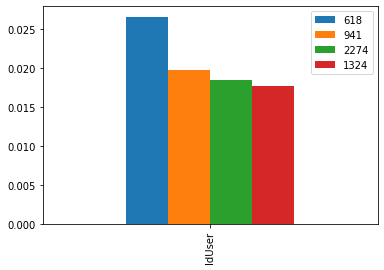

In [227]:
df = pd.DataFrame(elle[:4]).transpose()
df.plot.bar()

In [228]:
# the average of ELLE readings

elle.mean()

0.003419122218077831

In [229]:
#